This expriment shows the performance comparison between non-data augmented and post-data agumented

In [1]:
import os
import sys

sys.path.append('/home/xiaomeng/jupyter_base/AutoFS/code')
print(sys.path)

import pandas as pd

['/home/xiaomeng/jupyter_base', '/home/xiaomeng/miniconda3/envs/shaow/lib/python39.zip', '/home/xiaomeng/miniconda3/envs/shaow/lib/python3.9', '/home/xiaomeng/miniconda3/envs/shaow/lib/python3.9/lib-dynload', '', '/home/xiaomeng/.local/lib/python3.9/site-packages', '/home/xiaomeng/miniconda3/envs/shaow/lib/python3.9/site-packages', '/home/xiaomeng/jupyter_base/AutoFS/code']


In [7]:
from utils.tools import test_task_new
from feature_env import FeatureEvaluator
import matplotlib.pyplot as plt

MEASUREMENT = {
    'cls': ['Precision', 'Recall', 'F1score', 'ROC/AUC'],
    'reg': ['MAE', 'MSE', 'RAE', 'RMSE'],
    'det': ['MAP', 'F1score', 'RAS', 'Recall']
}
base_path = '/home/xiaomeng/jupyter_base/AutoFS/data'
def report_performance(name):
	fe = FeatureEvaluator(name)
	file_ours = f'{base_path}/history/{fe.task_name}/best-ours.hdf'
	file_random = f'{base_path}/history/{fe.task_name}/best-ours.0.hdf'
	if not os.path.exists(file_random):
		file_random =  f'{base_path}/history/{fe.task_name}/best-ours-suboptimal.0.hdf'
	assert os.path.exists(file_ours) and os.path.exists(file_random)
	ds_ours = pd.read_hdf(file_ours)
	ds_ran = pd.read_hdf(file_random)
	ours_p = test_task_new(ds_ours, task=fe.task_type)
	ran_p = test_task_new(ds_ran, task=fe.task_type)
	return ours_p, ran_p, fe.task_type

def show_and_out(name, id):
	ours_p, ran_p, type = report_performance(name)
	print(name)
	cols = MEASUREMENT[type]
	p = pd.DataFrame(zip(ours_p, ran_p, [id] * 4))
	p.columns = ['Ours', 'w/o Data Aug.', 'id']
	p.index = cols
	print(p)
	p.to_csv(f'/home/xiaomeng/jupyter_base/AutoFS/code/ours/exps/RQ2:NonInvariant/out/{name}.csv')

In [8]:
for id, i in enumerate(['spectf', 'svmguide3', 'german_credit', 'spam_base',
              'ionosphere', 'megawatt1', 'uci_credit_card',
                                         'openml_618', 'openml_589', 'openml_616', 'openml_607', 'openml_620',
              'openml_637',
              'openml_586', 'higgs']):
    show_and_out(i, id)

spectf
               Ours  w/o Data Aug.  id
Precision  0.841375       0.836861   0
Recall     0.849965       0.842488   0
F1score    0.828462       0.815229   0
ROC/AUC    0.676679       0.651787   0
svmguide3
               Ours  w/o Data Aug.  id
Precision  0.847201       0.847783   1
Recall     0.852808       0.851976   1
F1score    0.840154       0.838772   1
ROC/AUC    0.734998       0.730938   1
german_credit
               Ours  w/o Data Aug.  id
Precision  0.764845       0.766071   2
Recall     0.775000       0.776000   2
F1score    0.764595       0.761626   2
ROC/AUC    0.697381       0.689524   2
spam_base
               Ours  w/o Data Aug.  id
Precision  0.953255       0.953648   3
Recall     0.953054       0.953489   3
F1score    0.952951       0.953399   3
ROC/AUC    0.949011       0.949754   3
ionosphere
               Ours  w/o Data Aug.  id
Precision  0.955611       0.952517   4
Recall     0.954487       0.951670   4
F1score    0.953995       0.951268   4
ROC/AUC    0

/home/xiaomeng/miniconda3/envs/shaow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xiaomeng/miniconda3/envs/shaow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


megawatt1
               Ours  w/o Data Aug.  id
Precision  0.887131       0.866624   5
Recall     0.909333       0.893333   5
F1score    0.890596       0.877176   5
ROC/AUC    0.644589       0.635652   5
uci_credit_card
               Ours  w/o Data Aug.  id
Precision  0.802070       0.801603   6
Recall     0.819333       0.819000   6
F1score    0.798994       0.799205   6
ROC/AUC    0.658569       0.659757   6
openml_618
          Ours  w/o Data Aug.  id
MAE   0.806490       0.779520   7
MSE   0.890983       0.873664   7
RAE   0.486931       0.413557   7
RMSE  0.672793       0.648038   7
openml_589
          Ours  w/o Data Aug.  id
MAE   0.772430       0.763560   8
MSE   0.881654       0.877957   8
RAE   0.471371       0.450568   8
RMSE  0.656678       0.651419   8
openml_616
          Ours  w/o Data Aug.  id
MAE   0.793080       0.766260   9
MSE   0.875886       0.851124   9
RAE   0.454028       0.390359   9
RMSE  0.650068       0.616124   9
openml_607
          Ours  w/o Data Aug. 

In [48]:
import seaborn as sns
TASK_DICT = {'airfoil': 'reg', 'amazon_employee': 'cls', 'ap_omentum_ovary': 'cls',
             'bike_share': 'reg', 'german_credit': 'cls', 'higgs': 'cls',
             'housing_boston': 'reg', 'ionosphere': 'cls', 'lymphography': 'cls',
             'messidor_features': 'cls', 'openml_620': 'reg', 'pima_indian': 'cls',
             'spam_base': 'cls', 'spectf': 'cls', 'svmguide3': 'cls',
             'uci_credit_card': 'cls', 'wine_red': 'cls', 'wine_white': 'cls',
             'openml_586': 'reg', 'openml_589': 'reg', 'openml_607': 'reg',
             'openml_616': 'reg', 'openml_618': 'reg', 'openml_637': 'reg',
             'smtp': 'det', 'thyroid': 'det', 'yeast': 'det', 'wbc': 'det', 'mammography': 'det', 'arrhythmia': 'cls',
             'nomao': 'cls', 'megawatt1': 'cls'
             }
label_dict = {0:'Ours', 1:'w/o Data Aug.'}
# metric_dict = {2:'F1score', 0:'Precision', 1:'Recall', 3:'ROC/AUC'}

def trans_df(df:pd.DataFrame, task_type):
	metric_indice, label_index = df.shape
	transed_list = []
	for i in range(metric_indice):
		for j in range(label_index):
			value = df.values[i, j]
			transed_list.append([value, label_dict[j], MEASUREMENT[task_type][i]])
	return pd.DataFrame(transed_list)

def show_img(name):
    ds = pd.read_csv(f'/home/xiaomeng/jupyter_base/AutoFS/code/ours/exps/RQ2:NonInvariant/out/{name}.csv')
    df = ds.iloc[:, 1:-1]
    df.index = ds.iloc[:, 0]
    df = df * 100
    df = trans_df(df, TASK_DICT[name])
    plt.figure(dpi=120)
    ax = sns.barplot(data=df, x =2, y =0, hue=1, order = ['F1score', 'Precision', 'Recall', 'ROC/AUC'])
    ax.set_yscale('log')
    ax.set(xlabel='Metrics', ylabel='Performance', title=name)
    plt.show()


spectf


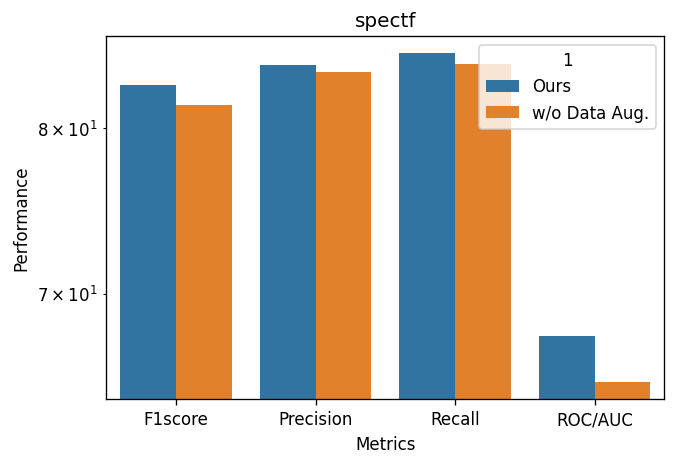

svmguide3


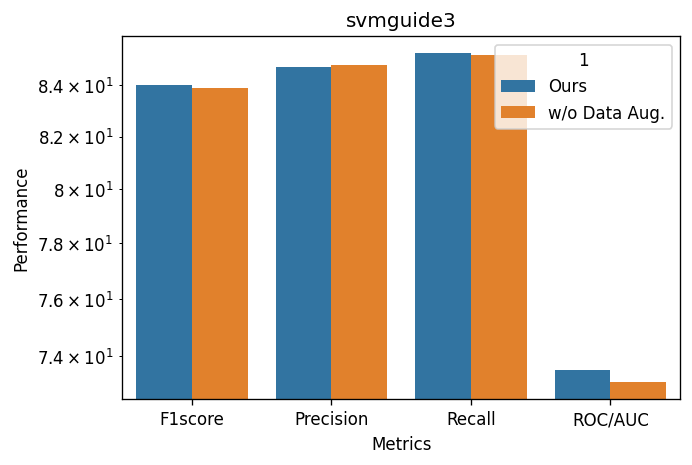

german_credit


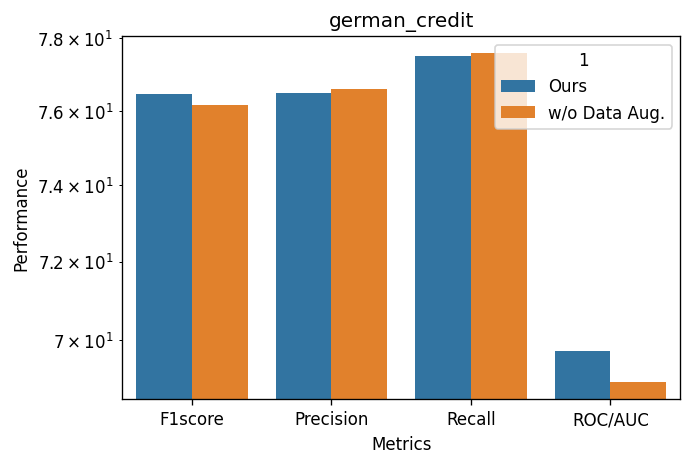

spam_base


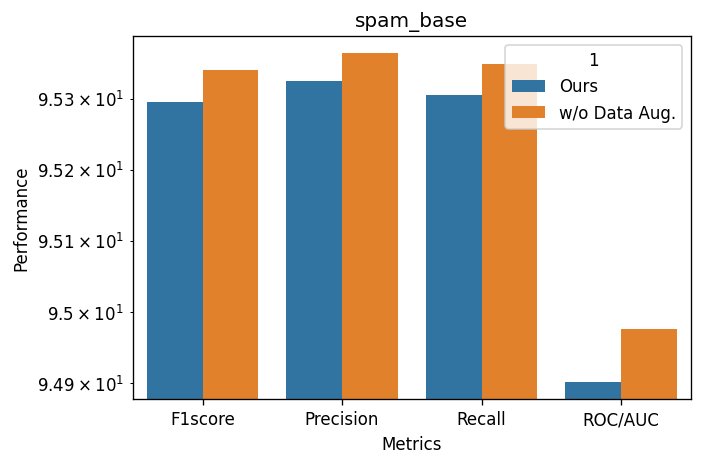

ionosphere


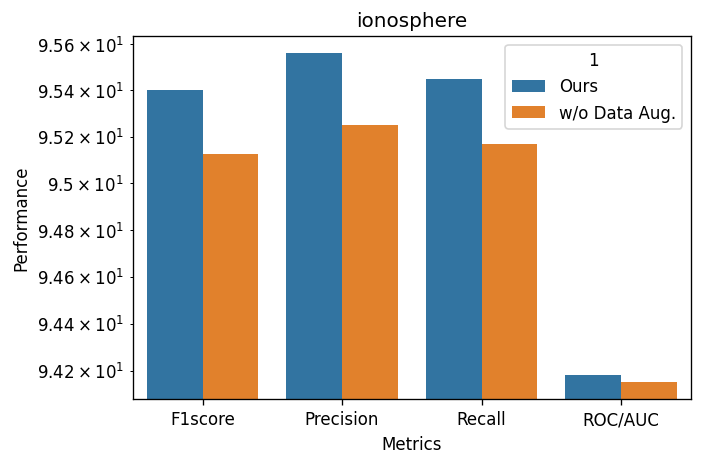

megawatt1


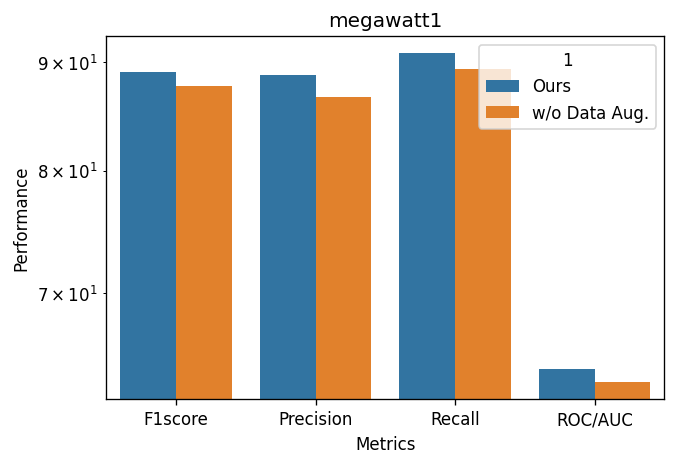

uci_credit_card


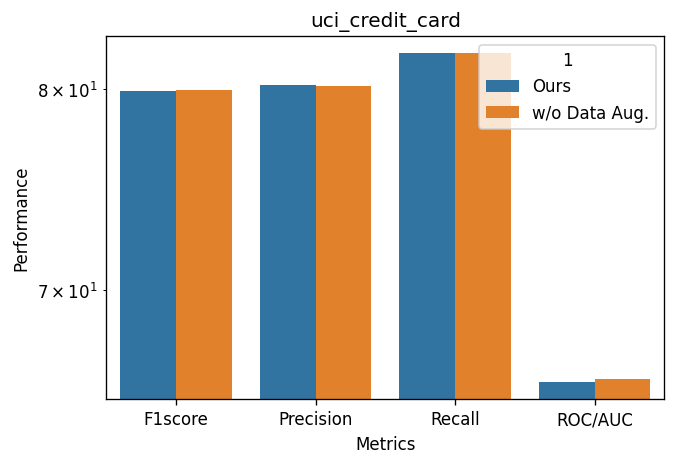

openml_618


ValueError: Data has no positive values, and therefore can not be log-scaled.

In [49]:
for id, i in enumerate(['spectf', 'svmguide3', 'german_credit', 'spam_base',
              'ionosphere', 'megawatt1', 'uci_credit_card',
                                         'openml_618', 'openml_589', 'openml_616', 'openml_607', 'openml_620',
              'openml_637',
              'openml_586', 'higgs']):
	print(i)
	show_img(i)